Here we will  see whether that the object which are orbiting the  earth is  hazardous or not


In [140]:
from  sklearn import svm
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import re
import seaborn as sns

In [141]:

# reading data from kaggle 
new_data = pd.read_csv('/kaggle/input/nasa-nearest-earth-objects/neo.csv')

In [142]:
new_data.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [143]:
# this is to check whether the dataset has any null value or not 
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [144]:
''' NOTE
-> As we can see we dont have any null value so we dont have to treat it
And we have some bool and object type data so we have make  them in integer of float  value so that the model can do 
its task'''

' NOTE\n-> As we can see we dont have any null value so we dont have to treat it\nAnd we have some bool and object type data so we have make  them in integer of float  value so that the model can do \nits task'

ANALYSIS OF DATASET

In [145]:
new_data.columns

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')

In [146]:
new_data.shape

(90836, 10)

In [147]:
df2= new_data.drop(['id','name'],axis=1)

In [148]:
df2.shape

(90836, 8)

In [149]:
print("~unique object in orbiting_body coulumn~")
df2['orbiting_body'].unique()
print("~unique object hazardous colimn~")
df2['hazardous'].unique()


~unique object in orbiting_body coulumn~
~unique object hazardous colimn~


array([False,  True])

In [150]:
df2.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [151]:
df3= df2.copy()

In [152]:
df3['sentry_object'].unique()

array([False])

In [153]:
df3_orbiting_body = df3['orbiting_body'].copy()
df3_orbiting_body.replace(['Earth'],1,inplace =True)
df3_orbiting_body.head

<bound method NDFrame.head of 0        1
1        1
2        1
3        1
4        1
        ..
90831    1
90832    1
90833    1
90834    1
90835    1
Name: orbiting_body, Length: 90836, dtype: int64>

In [154]:
for column in df3.columns:
    try: 
        df3[column]= df3[column].apply(lambda x: float(x))
        print("coumns : ",column)
    except:
        dummies = pd.get_dummies(df3[column])
        df3= df3.drop(column , axis = 1)
        dummies = dummies.drop(dummies.columns[0], axis = 1)
        df3 = pd.concat([df3,dummies],axis = 1)

coumns :  est_diameter_min
coumns :  est_diameter_max
coumns :  relative_velocity
coumns :  miss_distance
coumns :  sentry_object
coumns :  absolute_magnitude
coumns :  hazardous


In [155]:
df3 = pd.concat([df3_orbiting_body,df3],axis = 1)

In [156]:
df3.head()

,orbiting_body,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,sentry_object,absolute_magnitude,hazardous
0,1,1.198271,2.679415,13569.249224,5.483974e+07,0.0,16.73,0.0
1,1,0.265800,0.594347,73588.726663,6.143813e+07,0.0,20.00,1.0
2,1,0.722030,1.614507,114258.692129,4.979872e+07,0.0,17.83,0.0
3,1,0.096506,0.215794,24764.303138,2.543497e+07,0.0,22.20,0.0
4,1,0.255009,0.570217,42737.733765,4.627557e+07,0.0,20.09,1.0


In [157]:
df3.describe()

,orbiting_body,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,sentry_object,absolute_magnitude,hazardous
count,90836.0,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.0,90836.000000,90836.000000
mean,1.0,0.127432,0.284947,48066.918918,3.706655e+07,0.0,23.527103,0.097318
std,0.0,0.298511,0.667491,25293.296961,2.235204e+07,0.0,2.894086,0.296392
min,1.0,0.000609,0.001362,203.346433,6.745533e+03,0.0,9.230000,0.000000
25%,1.0,0.019256,0.043057,28619.020645,1.721082e+07,0.0,21.340000,0.000000
50%,1.0,0.048368,0.108153,44190.117890,3.784658e+07,0.0,23.700000,0.000000
75%,1.0,0.143402,0.320656,62923.604633,5.654900e+07,0.0,25.700000,0.000000
max,1.0,37.892650,84.730541,236990.128088,7.479865e+07,0.0,33.200000,1.000000


DATA ANALYSIS

In [158]:
data_analysis =df3.copy()


In [159]:
data_analysis.columns


Index(['orbiting_body', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')

In [160]:
feature_epo=['orbiting_body', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'sentry_object',
       'absolute_magnitude']
target = ['hazardous']

In [161]:
data_analysis.describe

<bound method NDFrame.describe of        orbiting_body  est_diameter_min  est_diameter_max  relative_velocity  \
0                  1          1.198271          2.679415       13569.249224   
1                  1          0.265800          0.594347       73588.726663   
2                  1          0.722030          1.614507      114258.692129   
3                  1          0.096506          0.215794       24764.303138   
4                  1          0.255009          0.570217       42737.733765   
...              ...               ...               ...                ...   
90831              1          0.026580          0.059435       52078.886692   
90832              1          0.016771          0.037501       46114.605073   
90833              1          0.031956          0.071456        7566.807732   
90834              1          0.007321          0.016370       69199.154484   
90835              1          0.039862          0.089133       27024.455553   

       miss_dista

In [162]:
# scalling to understand these big numbers

scaler = MinMaxScaler()
data_analysis[feature_epo] = scaler.fit_transform(data_analysis[feature_epo])



In [163]:
data_analysis.describe

<bound method NDFrame.describe of        orbiting_body  est_diameter_min  est_diameter_max  relative_velocity  \
0                0.0          0.031607          0.031607           0.056447   
1                0.0          0.006999          0.006999           0.309922   
2                0.0          0.019039          0.019039           0.481680   
3                0.0          0.002531          0.002531           0.103726   
4                0.0          0.006714          0.006714           0.179632   
...              ...               ...               ...                ...   
90831            0.0          0.000685          0.000685           0.219081   
90832            0.0          0.000427          0.000427           0.193893   
90833            0.0          0.000827          0.000827           0.031097   
90834            0.0          0.000177          0.000177           0.291384   
90835            0.0          0.001036          0.001036           0.113271   

       miss_dista

In [164]:
data_analysis.columns

Index(['orbiting_body', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')

<Axes: >

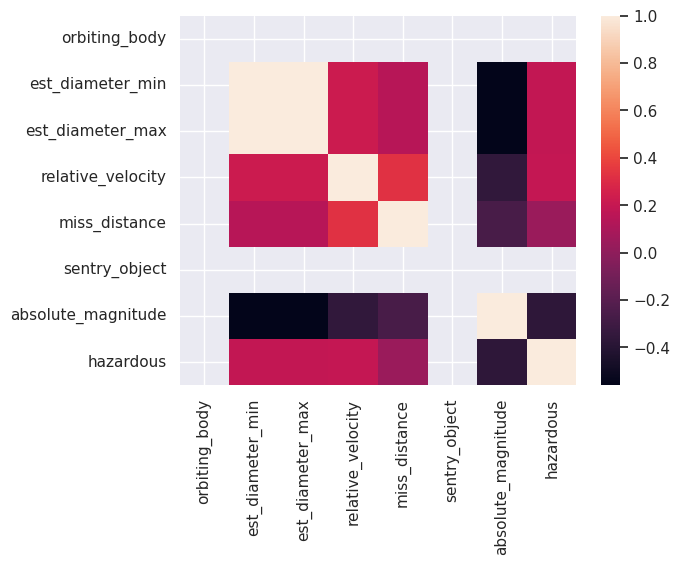

In [165]:
sns.heatmap(data_analysis.corr())

In [166]:
# by using heat map we can see that that sentry_object and  orbiting body is not in the 
# relation with hazardous  so we can call them out 


<Axes: xlabel='orbiting_body', ylabel='hazardous'>

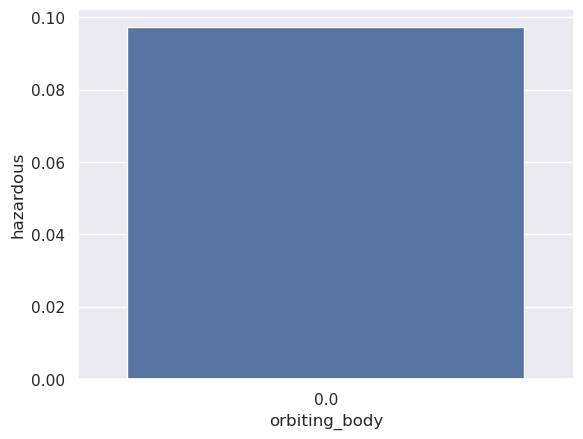

In [167]:
bar_data = data_analysis.groupby("orbiting_body").mean().reset_index()

sns.barplot(x="orbiting_body", y='hazardous', data=bar_data)


In [168]:
# This  shows that if the object is not  orbitating the earth it will not effect the  earth 
# since it has only one variable  we can remove


<Axes: xlabel='orbiting_body', ylabel='hazardous'>

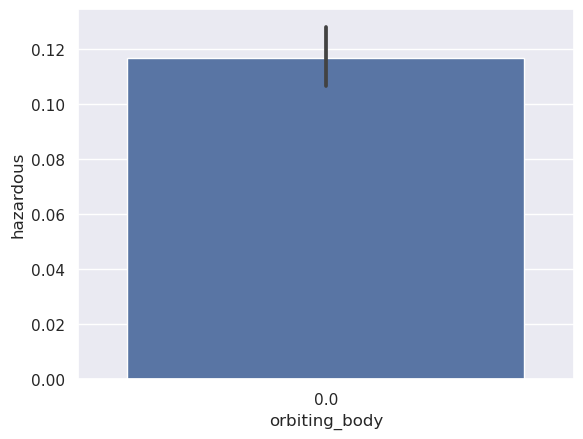

In [169]:
bar_data = data_analysis.groupby("est_diameter_min").mean().reset_index()

sns.barplot(x="orbiting_body", y='hazardous', data=bar_data)

In [170]:
df4=data_analysis.drop(['sentry_object','orbiting_body'],axis= 1)
df4.head

<bound method NDFrame.head of        est_diameter_min  est_diameter_max  relative_velocity  miss_distance  \
0              0.031607          0.031607           0.056447       0.733141   
1              0.006999          0.006999           0.309922       0.821364   
2              0.019039          0.019039           0.481680       0.665740   
3              0.002531          0.002531           0.103726       0.339986   
4              0.006714          0.006714           0.179632       0.618634   
...                 ...               ...                ...            ...   
90831          0.000685          0.000685           0.219081       0.164371   
90832          0.000427          0.000427           0.193893       0.726208   
90833          0.000827          0.000827           0.031097       0.379640   
90834          0.000177          0.000177           0.291384       0.918352   
90835          0.001036          0.001036           0.113271       0.799089   

       absolute_magni

/tmp/ipykernel_32/3878362209.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_analysis.est_diameter_min, kde = False)
/tmp/ipykernel_32/3878362209.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_analysis.est_diameter_max, kde = False)
/tmp/ipykernel_32/3878362209.py:12: UserWarn

<Axes: xlabel='absolute_magnitude'>

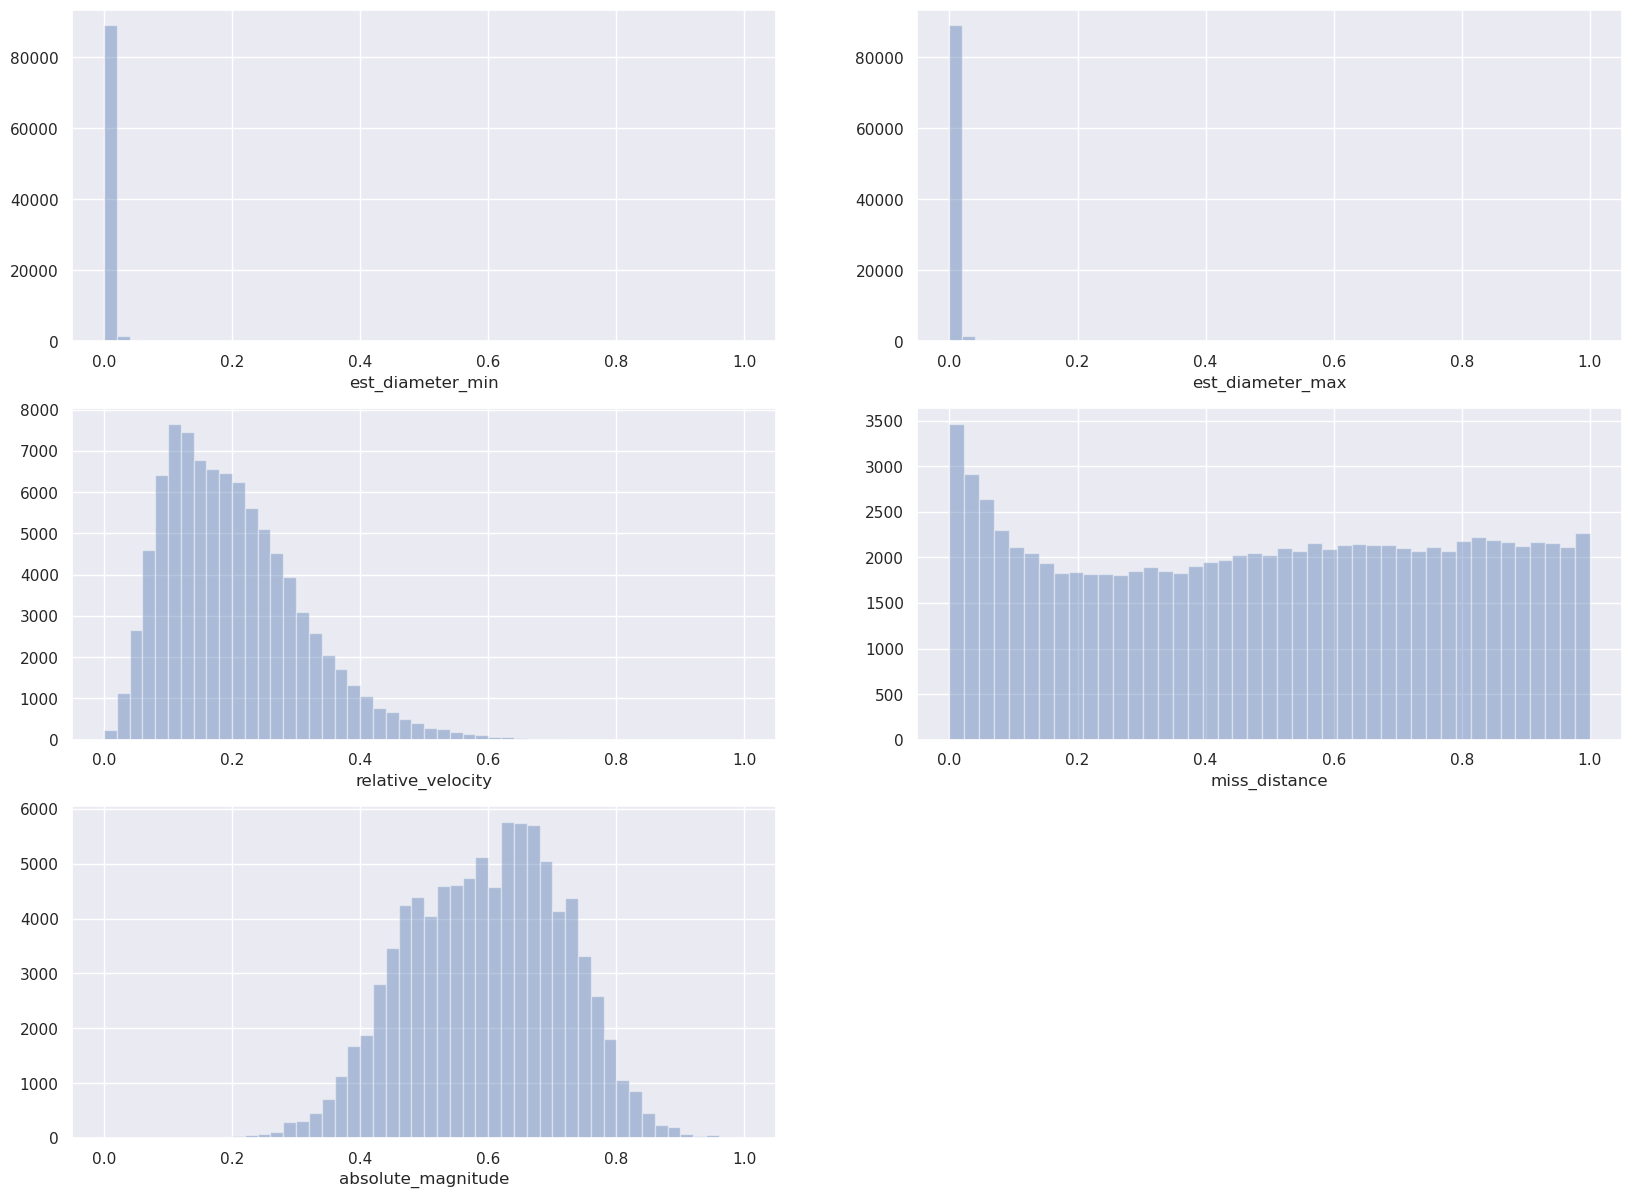

In [171]:
plt.figure(figsize = (20,25))

sns.set(color_codes = True)

plt.subplot(5,2,1)
sns.distplot(data_analysis.est_diameter_min, kde = False)

plt.subplot(5,2,2)
sns.distplot(data_analysis.est_diameter_max, kde = False)

plt.subplot(5,2,3)
sns.distplot(data_analysis.relative_velocity, kde = False)

plt.subplot(5,2,4)
sns.distplot(data_analysis.miss_distance, kde = False)

plt.subplot(5,2,5)
sns.distplot(data_analysis.absolute_magnitude, kde = False)

In [172]:
# now lets see if  whether each asteriod has effect on the  classification or not


/tmp/ipykernel_32/3327019106.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x = "hazardous", y = "relative_velocity", palette = "Set2", data = data_analysis)


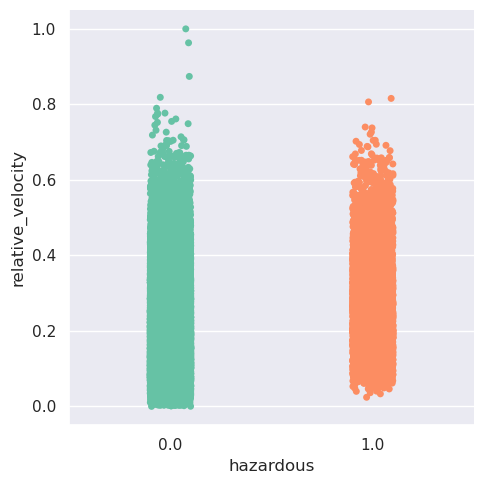

In [173]:


sns.catplot(x = "hazardous", y = "relative_velocity", palette = "Set2", data = data_analysis)



/tmp/ipykernel_32/314322248.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x = "hazardous", y = "miss_distance", palette = "Set2", data = data_analysis)


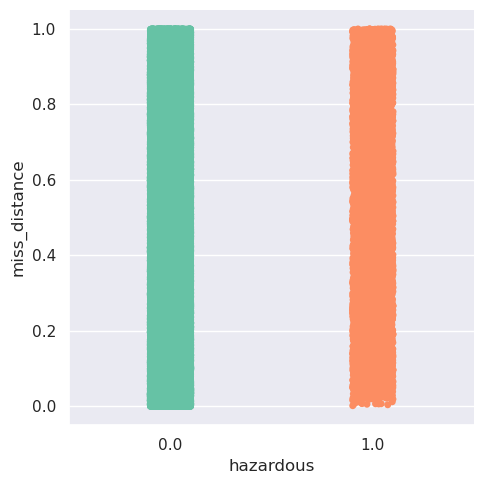

In [174]:
sns.catplot(x = "hazardous", y = "miss_distance", palette = "Set2", data = data_analysis)

/tmp/ipykernel_32/4277218977.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x = "hazardous", y = "absolute_magnitude", palette = "Set2", data = data_analysis)


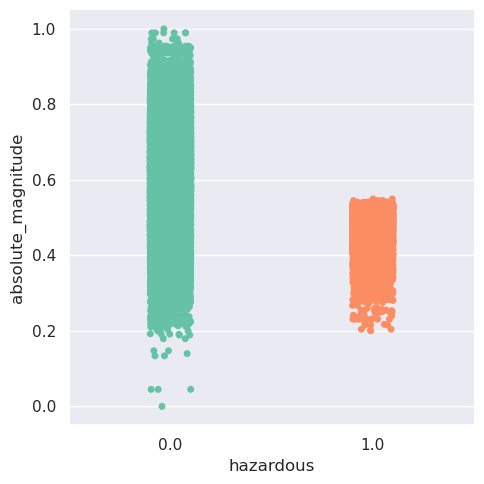

In [175]:
sns.catplot(x = "hazardous", y = "absolute_magnitude", palette = "Set2", data = data_analysis)

/tmp/ipykernel_32/2730161947.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x = "hazardous", y = "est_diameter_min", palette = "Set2", data = data_analysis)


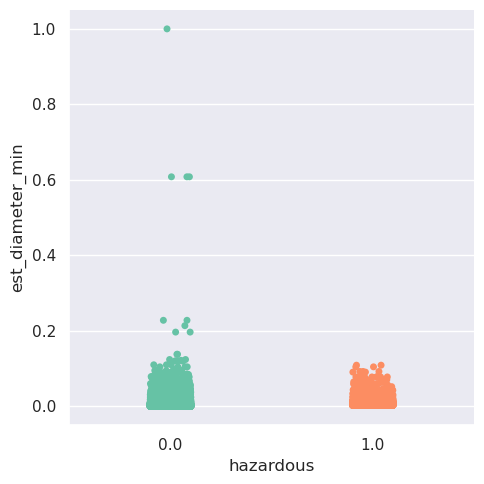

In [176]:
sns.catplot(x = "hazardous", y = "est_diameter_min", palette = "Set2", data = data_analysis)

/tmp/ipykernel_32/2684932967.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x = "hazardous", y = "est_diameter_max", palette = "Set2", data = data_analysis)


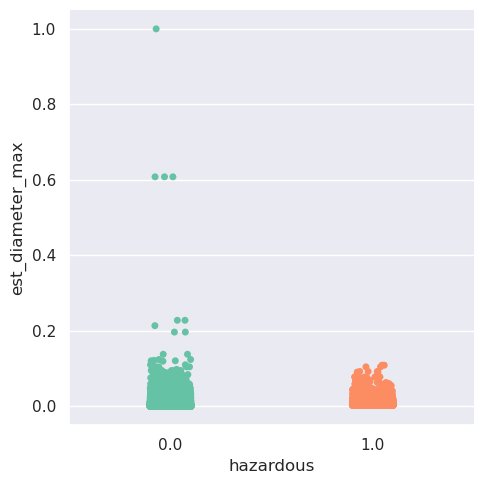

In [177]:
sns.catplot(x = "hazardous", y = "est_diameter_max", palette = "Set2", data = data_analysis)

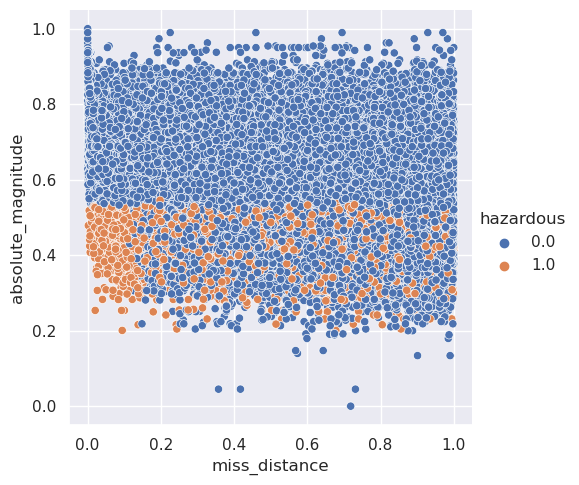

In [178]:


sns.relplot(x='miss_distance', y = 'absolute_magnitude', hue = "hazardous", data = data_analysis)



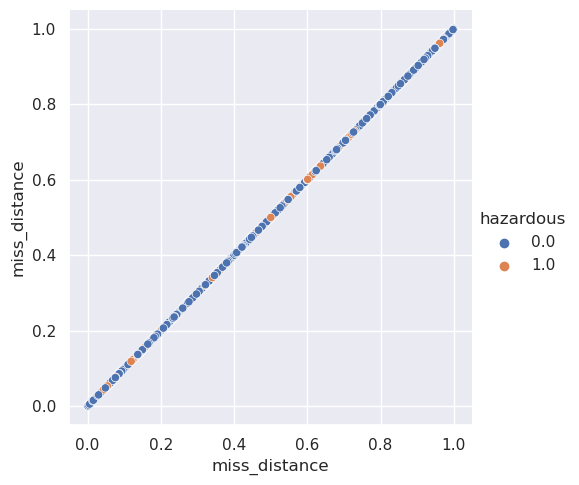

In [179]:
sns.relplot(x='miss_distance', y = 'miss_distance', hue = "hazardous", data = data_analysis)

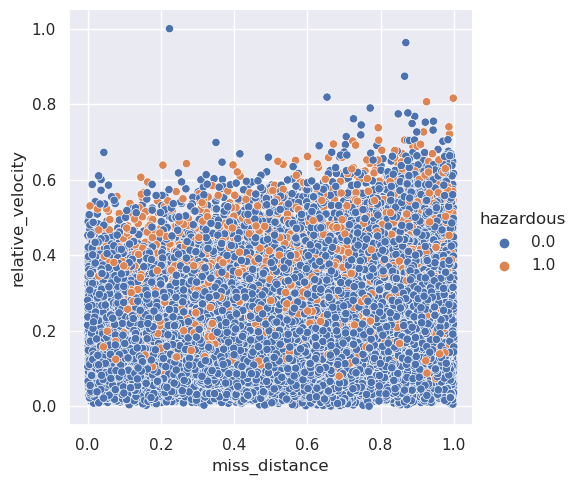

In [180]:
sns.relplot(x='miss_distance', y = 'relative_velocity', hue = "hazardous", data = data_analysis)

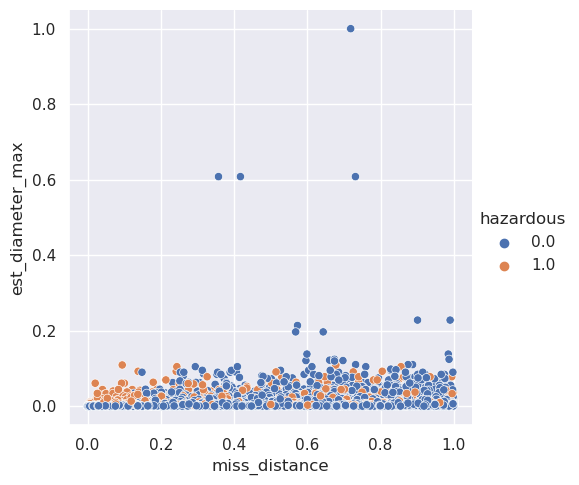

In [181]:
sns.relplot(x='miss_distance', y = 'est_diameter_max', hue = "hazardous", data = data_analysis)

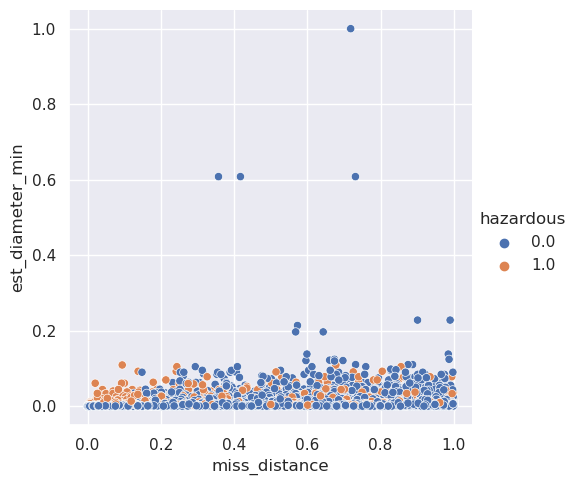

In [182]:
sns.relplot(x='miss_distance', y = 'est_diameter_min', hue = "hazardous", data = data_analysis)

In [183]:
feature_epo=['est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance',
       'absolute_magnitude']
target = ['hazardous']

In [184]:
X= data_analysis.drop(['hazardous'],axis = 1)
y= data_analysis.hazardous 

In [185]:
# hyper parameter tunning 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import numpy as np

X, y = make_classification(n_samples=5000, n_features=20, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

svm = SVC()

param_distributions = {
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10, 0.5],
    'gamma': [0.01, 0.1, 1],
    'tol': [1e-3, 1e-4, 1e-5]
}

random_search = RandomizedSearchCV(svm, param_distributions, n_iter=100, cv=5, n_jobs=-1, random_state=42)
random_search.fit(x_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

y_pred = best_model.predict(x_test)
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)






Confusion Matrix:
[[663 112]
 [ 86 639]]


In [186]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import numpy as np

X, y = make_classification(n_samples=5000, n_features=20, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

svm = SVC()

param_distributions = {
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10, 0.5],
    'gamma': [0.01, 0.1, 1],
    'tol': [1e-3, 1e-4, 1e-5]
}

random_search = RandomizedSearchCV(svm, param_distributions, n_iter=100, cv=5, n_jobs=-1, random_state=42)
random_search.fit(x_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_
print(best_params)
print("-----")
print (best_model)

y_pred = best_model.predict(x_test)
f1 = f1_score(y_test, y_pred)
print("-----------------------------------------------------------------")
print("F1 Score:", f1)


{'tol': 0.001, 'kernel': 'rbf', 'gamma': 0.01, 'C': 0.1}
-----
SVC(C=0.1, gamma=0.01)
-----------------------------------------------------------------
F1 Score: 0.8658536585365854
